In [1]:
pip install quandl

In [2]:
import quandl
import numpy as np

In [3]:
quandl.ApiConfig.api_key = 'FZCdiqtsRgoffcyx2XqB'

In [4]:
df = quandl.get("XNSE/ABB")
print(df.head())

                  Open        High  ...  Adjustment Factor  Adjustment Type
Date                                ...                                    
2010-01-01  670.250115  670.250115  ...                NaN              NaN
2010-01-04  672.783977  676.977955  ...                NaN              NaN
2010-01-05  669.288995  674.487780  ...                NaN              NaN
2010-01-06  672.478166  674.050908  ...                NaN              NaN
2010-01-07  667.541504  690.258885  ...                NaN              NaN

[5 rows x 7 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2347 entries, 2010-01-01 to 2018-12-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2347 non-null   float64
 1   High               2347 non-null   float64
 2   Low                2347 non-null   float64
 3   Close              2347 non-null   float64
 4   Volume             2347 non-null   float64
 5   Adjustment Factor  9 non-null      float64
 6   Adjustment Type    9 non-null      float64
dtypes: float64(7)
memory usage: 146.7 KB


In [6]:
x = df.drop("Adjustment Factor",axis=1)
y = x.drop("Adjustment Type",axis=1)
print(y)

                   Open         High          Low        Close         Volume
Date                                                                         
2010-01-01   670.250115   670.250115   670.250115   670.250115       0.000000
2010-01-04   672.783977   676.977955   664.133897   668.764748  204731.113433
2010-01-05   669.288995   674.487780   665.794013   667.060944  175062.411940
2010-01-06   672.478166   674.050908   664.264959   667.279381  222114.868657
2010-01-07   667.541504   690.258885   666.842508   683.531045  438939.268657
...                 ...          ...          ...          ...            ...
2018-12-25  1172.127177  1172.127177  1172.127177  1172.127177       0.000000
2018-12-26  1171.272037  1186.394516  1156.689646  1165.961166  138249.429851
2018-12-27  1179.193335  1190.895254  1172.397221  1178.293188   80301.008955
2018-12-28  1188.149804  1191.210306  1178.338195  1182.163822   55788.394030
2018-12-31  1183.694073  1210.653493  1175.502730  1203.272283  

In [8]:
y = y[['Close']]
print(y.head())

                 Close
Date                  
2010-01-01  670.250115
2010-01-04  668.764748
2010-01-05  667.060944
2010-01-06  667.279381
2010-01-07  683.531045


In [9]:
# Variable for prediction for future days
forecast = 10
y['Prediction'] = y[['Close']].shift(-forecast)

print(y.tail())

                  Close  Prediction
Date                               
2018-12-25  1172.127177         NaN
2018-12-26  1165.961166         NaN
2018-12-27  1178.293188         NaN
2018-12-28  1182.163822         NaN
2018-12-31  1203.272283         NaN


In [10]:
w = y.drop(['Prediction'],1)
w = w[:-forecast]
print(w)

                  Close
Date                   
2010-01-01   670.250115
2010-01-04   668.764748
2010-01-05   667.060944
2010-01-06   667.279381
2010-01-07   683.531045
...                 ...
2018-12-11  1260.161610
2018-12-12  1287.121031
2018-12-13  1294.997322
2018-12-14  1287.301060
2018-12-17  1259.891566

[2337 rows x 1 columns]


In [11]:
q=y['Prediction']
q=q[:-forecast]
print(q)

Date
2010-01-01     748.188207
2010-01-04     750.678381
2010-01-05     734.033531
2010-01-06     751.158941
2010-01-07     732.242353
                 ...     
2018-12-11    1172.127177
2018-12-12    1165.961166
2018-12-13    1178.293188
2018-12-14    1182.163822
2018-12-17    1203.272283
Name: Prediction, Length: 2337, dtype: float64


In [12]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(w,q,test_size =0.20)

In [14]:
svr_rbf = SVR(kernel='rbf',C=1e3)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
svr_out = svr_rbf.score(x_test,y_test)
print (svr_out)

0.9552792631440996


In [16]:
x_forecast = y.drop(['Prediction'],1)[-forecast:]
print(x_forecast)

                  Close
Date                   
2018-12-18  1200.751870
2018-12-19  1200.886892
2018-12-20  1182.928948
2018-12-21  1172.622258
2018-12-24  1172.127177
2018-12-25  1172.127177
2018-12-26  1165.961166
2018-12-27  1178.293188
2018-12-28  1182.163822
2018-12-31  1203.272283


In [17]:
svr_prediction = svr_rbf.predict(x_forecast)
print(svr_prediction)

[1196.16907783 1196.280002   1180.96026872 1171.65789065 1171.20203579
 1171.20203579 1165.45809547 1176.82109994 1180.28224075 1198.22912728]


In [18]:
import matplotlib.pyplot as plt

In [19]:
z = y['2018-11-30':]

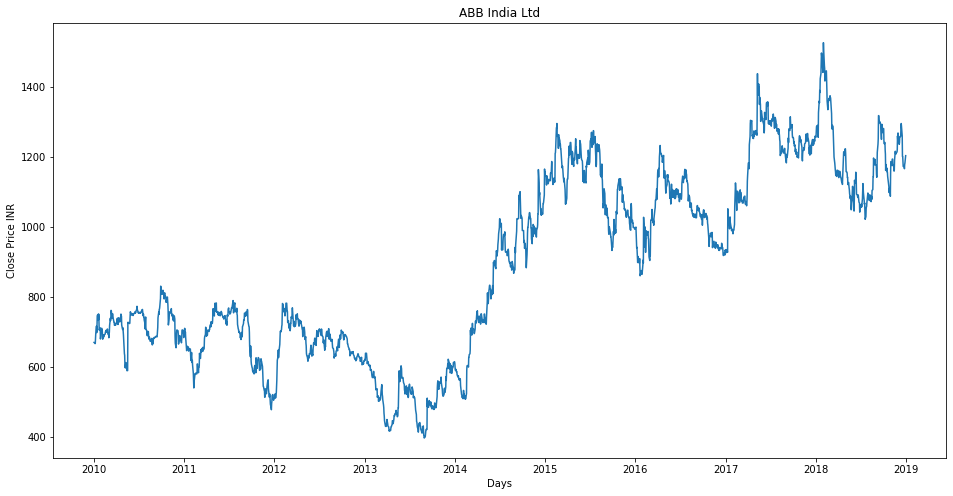

In [20]:
plt.figure(figsize=(16,8))
plt.title('ABB India Ltd')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(y['Close'])
plt.show()

In [21]:
predict = svr_prediction
valid = y[w.shape[0]:]
valid['Predict'] = predict

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


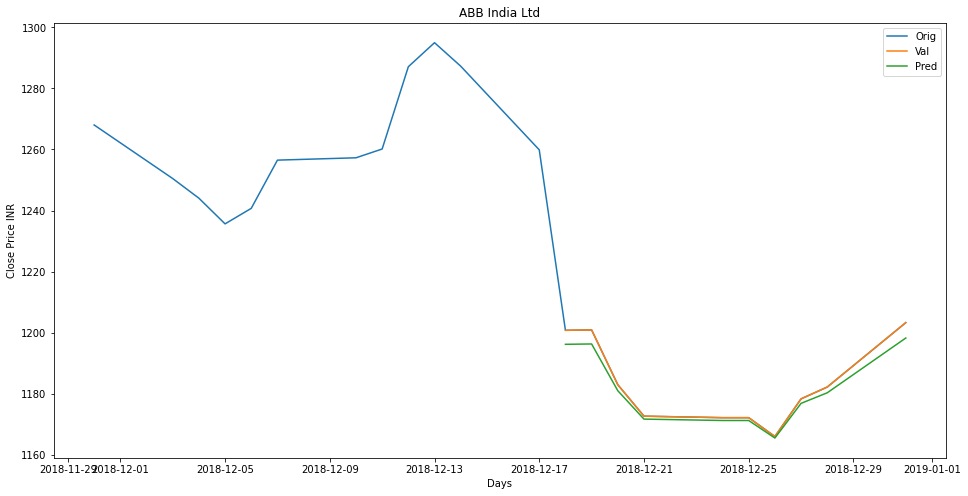

In [22]:
plt.figure(figsize=(16,8))
plt.title('ABB India Ltd')
plt.xlabel('Days')
plt.ylabel('Close Price INR')
plt.plot(z['Close'])
plt.plot(valid[['Close','Predict']])
plt.legend(['Orig','Val','Pred'])
plt.show()